<a href="https://colab.research.google.com/github/chi-hun/dacon/blob/main/%ED%8C%94%EB%8B%B9%EB%8C%90_%ED%99%8D%EC%88%98_%EC%95%88%EC%A0%84%EC%9A%B4%EC%98%81%EC%97%90_%EB%94%B0%EB%A5%B8_%ED%95%9C%EA%B0%95_%EC%88%98%EC%9C%84%EC%98%88%EC%B8%A1_AI_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

팔당댐 홍수 안전운영에 따른 한강 수위예측 AI 경진대회 https://dacon.io/competitions/official/235949/overview/description

# module

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

# data load

In [5]:
!unzip /content/competition_data.zip

Archive:  /content/competition_data.zip
   creating: rf_data/
  inflating: rf_data/rf_2012.csv     
  inflating: rf_data/rf_2013.csv     
  inflating: rf_data/rf_2014.csv     
  inflating: rf_data/rf_2015.csv     
  inflating: rf_data/rf_2016.csv     
  inflating: rf_data/rf_2017.csv     
  inflating: rf_data/rf_2018.csv     
  inflating: rf_data/rf_2019.csv     
  inflating: rf_data/rf_2020.csv     
  inflating: rf_data/rf_2021.csv     
  inflating: rf_data/rf_2022.csv     
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   
   creating: water_data/
  inflating: water_data/data_2012.csv  
  inflating: water_data/data_2013.csv  
  inflating: water_data/data_2014.csv  
  inflating: water_data/data_2015.csv  
  inflating: water_data/data_2016.csv  
  inflating: water_data/data_2017.csv  
  inflating: water_data/data_2018.csv  
  inflating: water_data/data_2019.csv  
  inflating: water_data/data_2020.csv  
  inflating: water_data/da

In [3]:
path_rf = sorted(glob('/content/rf_data/*'))
path_wa = sorted(glob('/content/water_data/*'))
def concat_df(path):
    for i in range(len(path)):
        if i == 0:
            df = pd.read_csv(path[i])
        else:
            df_p = pd.read_csv(path[i])
            df = pd.concat([df, df_p], axis = 0)
    return df
df_rf = concat_df(path_rf)
df_wa = concat_df(path_wa)

# EDA

In [28]:
df_wa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276336 entries, 0 to 11375
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ymdhm       276336 non-null  object 
 1   swl         275593 non-null  float64
 2   inf         275593 non-null  float64
 3   sfw         275593 non-null  float64
 4   ecpc        275593 non-null  float64
 5   tototf      275593 non-null  float64
 6   tide_level  271409 non-null  float64
 7   wl_1018662  276277 non-null  float64
 8   fw_1018662  259956 non-null  float64
 9   wl_1018680  276277 non-null  float64
 10  fw_1018680  79487 non-null   float64
 11  wl_1018683  276277 non-null  float64
 12  fw_1018683  275057 non-null  float64
 13  wl_1019630  276277 non-null  float64
 14  fw_1019630  276277 non-null  float64
dtypes: float64(14), object(1)
memory usage: 33.7+ MB


In [27]:
df_wa.head()

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630
0,2012-05-01 00:00,24.800,555.0,219.07,24.93,555.0,445.0,310.7,469.05,300.2,0.0,290.0,729.80,275.3,540.18
1,2012-05-01 00:10,24.794,464.6,218.86,25.15,562.9,449.0,314.7,498.00,300.2,0.0,290.0,731.48,275.3,540.18
2,2012-05-01 00:20,24.789,478.1,218.69,25.31,576.4,451.0,313.7,490.68,301.2,0.0,290.0,726.42,275.3,540.18
3,2012-05-01 00:30,24.789,464.8,218.69,25.31,563.1,452.0,311.7,476.21,301.2,0.0,290.0,726.42,276.3,552.17
4,2012-05-01 00:40,24.789,478.1,218.69,25.31,576.4,450.0,311.7,476.21,301.2,0.0,291.0,707.17,277.3,564.29


In [30]:
df_wa.isna().sum()

ymdhm              0
swl              743
inf              743
sfw              743
ecpc             743
tototf           743
tide_level      4927
wl_1018662        59
fw_1018662     16380
wl_1018680        59
fw_1018680    196849
wl_1018683        59
fw_1018683      1279
wl_1019630        59
fw_1019630        59
dtype: int64

In [31]:
df_rf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276336 entries, 0 to 11375
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ymdhm        276336 non-null  object 
 1   rf_10184100  276336 non-null  float64
 2   rf_10184110  276336 non-null  float64
 3   rf_10184140  276336 non-null  float64
dtypes: float64(3), object(1)
memory usage: 10.5+ MB


In [32]:
df_rf.head()

,ymdhm,rf_10184100,rf_10184110,rf_10184140
0,2012-05-01 00:00,0.0,0.0,0.0
1,2012-05-01 00:10,0.0,0.0,0.0
2,2012-05-01 00:20,0.0,0.0,0.0
3,2012-05-01 00:30,0.0,0.0,0.0
4,2012-05-01 00:40,0.0,0.0,0.0


In [33]:
df_rf.isna().sum()

ymdhm          0
rf_10184100    0
rf_10184110    0
rf_10184140    0
dtype: int64

## concat

In [59]:
df_rf.columns = ['ymdhm_1','rf_10184100', 'rf_10184110', 'rf_10184140']

In [60]:
df = pd.concat([df_wa, df_rf], axis=1)

In [61]:
df = df.drop('ymdhm_1', axis=1)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276336 entries, 0 to 11375
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ymdhm        276336 non-null  object 
 1   swl          275593 non-null  float64
 2   inf          275593 non-null  float64
 3   sfw          275593 non-null  float64
 4   ecpc         275593 non-null  float64
 5   tototf       275593 non-null  float64
 6   tide_level   271409 non-null  float64
 7   wl_1018662   276277 non-null  float64
 8   fw_1018662   259956 non-null  float64
 9   wl_1018680   276277 non-null  float64
 10  fw_1018680   79487 non-null   float64
 11  wl_1018683   276277 non-null  float64
 12  fw_1018683   275057 non-null  float64
 13  wl_1019630   276277 non-null  float64
 14  fw_1019630   276277 non-null  float64
 15  rf_10184100  276336 non-null  float64
 16  rf_10184110  276336 non-null  float64
 17  rf_10184140  276336 non-null  float64
dtypes: float64(17), object(1)

In [123]:
df.describe()

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,...,fw_1019630,rf_10184100,rf_10184110,rf_10184140,year,month,week,day,hour,minute
count,276336.000000,276336.000000,275593.000000,275593.000000,275593.000000,271409.000000,276277.000000,259956.000000,276277.000000,79487.0,...,276277.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000
mean,25.071728,548.533893,219.369709,24.630877,542.751685,347.219024,320.848704,727.126354,307.935311,0.0,...,1056.638736,0.034074,0.038265,0.035985,2016.726420,7.431475,30.520063,15.774883,11.500000,25.000000
std,0.458487,1110.983698,10.623485,10.623098,1105.604956,174.542578,90.983520,897.191749,82.627360,0.0,...,1428.376321,0.338607,0.370553,0.360769,3.017358,1.713868,7.630995,8.846538,6.922199,17.078282
min,0.000000,-990.000000,-0.010000,2.150000,-990.000000,39.000000,0.000000,243.290000,0.000000,0.0,...,212.040000,0.000000,0.000000,0.000000,2012.000000,5.000000,17.000000,1.000000,0.000000,0.000000
25%,24.980000,127.410000,211.770000,14.600000,132.000000,193.000000,286.700000,337.640000,276.200000,0.0,...,449.120000,0.000000,0.000000,0.000000,2014.000000,6.000000,24.000000,8.000000,5.750000,10.000000
50%,25.100000,249.500000,217.630000,26.370000,175.000000,328.000000,305.700000,461.960000,296.200000,0.0,...,679.420000,0.000000,0.000000,0.000000,2017.000000,7.000000,30.000000,16.000000,11.500000,25.000000
75%,25.190000,530.000000,229.400000,32.230000,507.000000,489.000000,341.700000,743.640000,328.200000,0.0,...,1142.220000,0.000000,0.000000,0.000000,2019.000000,9.000000,37.000000,23.000000,17.250000,40.000000
max,25.449000,25991.500000,241.850000,244.010000,25791.500000,842.000000,1287.700000,9405.640000,1146.200000,0.0,...,29854.120000,24.000000,21.000000,24.000000,2022.000000,10.000000,44.000000,31.000000,23.000000,50.000000


In [136]:
df.columns

Index(['ymdhm', 'swl', 'inf', 'sfw', 'ecpc', 'tototf', 'tide_level',
       'wl_1018662', 'fw_1018662', 'wl_1018680', 'fw_1018680', 'wl_1018683',
       'fw_1018683', 'wl_1019630', 'fw_1019630', 'rf_10184100', 'rf_10184110',
       'rf_10184140', 'year', 'month', 'week', 'day', 'hour', 'minute', 'xx'],
      dtype='object')

## ymdhm(datetime)

In [62]:
df['year'] = pd.to_datetime(df['ymdhm']).dt.year
df['month'] = pd.to_datetime(df['ymdhm']).dt.month
df['week'] = pd.to_datetime(df['ymdhm']).dt.week
df['day'] = pd.to_datetime(df['ymdhm']).dt.day
df['hour'] = pd.to_datetime(df['ymdhm']).dt.hour
df['minute'] = pd.to_datetime(df['ymdhm']).dt.minute

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
df.head()

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,...,fw_1019630,rf_10184100,rf_10184110,rf_10184140,year,month,week,day,hour,minute
0,2012-05-01 00:00,24.800,555.0,219.07,24.93,555.0,445.0,310.7,469.05,300.2,...,540.18,0.0,0.0,0.0,2012,5,18,1,0,0
1,2012-05-01 00:10,24.794,464.6,218.86,25.15,562.9,449.0,314.7,498.00,300.2,...,540.18,0.0,0.0,0.0,2012,5,18,1,0,10
2,2012-05-01 00:20,24.789,478.1,218.69,25.31,576.4,451.0,313.7,490.68,301.2,...,540.18,0.0,0.0,0.0,2012,5,18,1,0,20
3,2012-05-01 00:30,24.789,464.8,218.69,25.31,563.1,452.0,311.7,476.21,301.2,...,552.17,0.0,0.0,0.0,2012,5,18,1,0,30
4,2012-05-01 00:40,24.789,478.1,218.69,25.31,576.4,450.0,311.7,476.21,301.2,...,564.29,0.0,0.0,0.0,2012,5,18,1,0,40


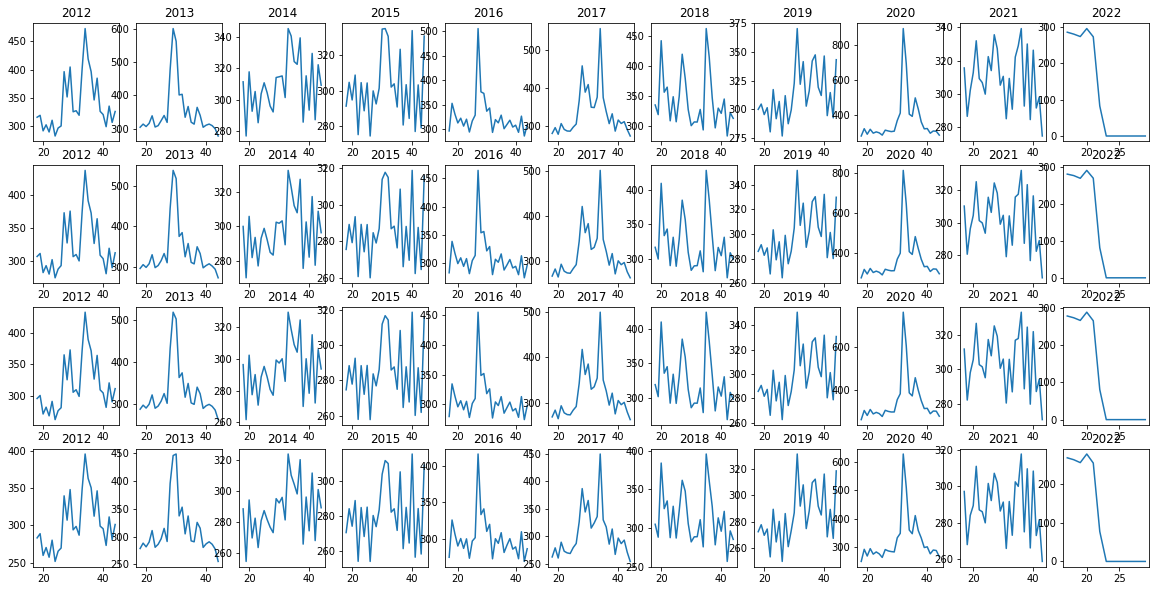

In [83]:
year_li = [i for i in range(2012,2023)]
wl = ['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']
plt.figure(figsize=(20,10))
for i in range(11):
    df_year = df[df['year'] == year_li[i]]
    df_year_mean = df_year.groupby('week').mean()
    for j in range(4):
        plt.subplot(4,11,i+1+(j*11))
        plt.title(f'{year_li[i]}')
        plt.plot(df_year_mean.index, df_year_mean[wl[j]])
plt.show()

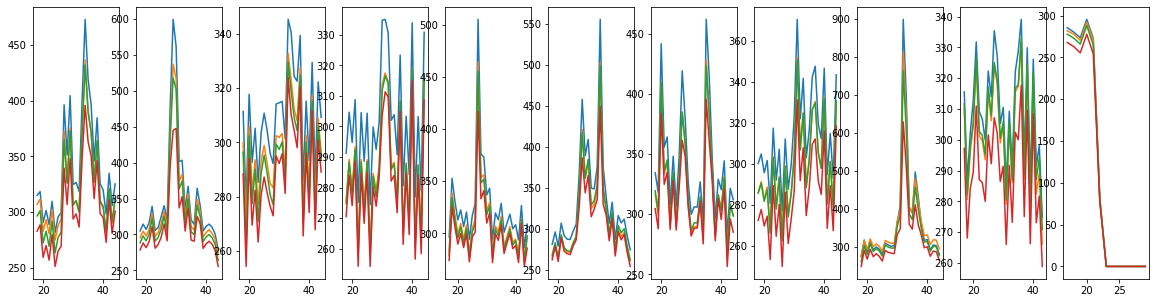

In [85]:
year_li = [i for i in range(2012,2023)]
wl = ['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']
plt.figure(figsize=(20,5))
for i in range(11):
    df_year = df[df['year'] == year_li[i]]
    df_year_mean = df_year.groupby('week').mean()
    plt.subplot(1,11,i+1)
    for j in range(4):
        plt.plot(df_year_mean.index, df_year_mean[wl[j]])
plt.show()

## swl(팔당댐 현재수위 (단위: El.m))

In [63]:
df[df['swl'].isna()].head()

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,...,fw_1019630,rf_10184100,rf_10184110,rf_10184140,year,month,week,day,hour,minute
13200,2012-07-31 16:00,NaN,NaN,NaN,NaN,NaN,557.0,297.7,381.12,273.2,...,337.86,0.0,0.0,0.0,2012,7,31,31,16,0
15089,2014-08-13 18:50,NaN,NaN,NaN,NaN,NaN,605.0,327.7,598.25,312.2,...,974.40,0.0,0.0,0.0,2014,8,33,13,18,50
15091,2014-08-13 19:10,NaN,NaN,NaN,NaN,NaN,660.0,322.7,558.57,309.2,...,974.40,0.0,0.0,0.0,2014,8,33,13,19,10
15092,2014-08-13 19:20,NaN,NaN,NaN,NaN,NaN,683.0,319.7,535.44,309.2,...,974.40,0.0,0.0,0.0,2014,8,33,13,19,20
15093,2014-08-13 19:30,NaN,NaN,NaN,NaN,NaN,699.0,318.7,527.84,308.2,...,974.40,0.0,0.0,0.0,2014,8,33,13,19,30


In [64]:
df[df['swl'].isna()].describe()

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,...,fw_1019630,rf_10184100,rf_10184110,rf_10184140,year,month,week,day,hour,minute
count,0.0,0.0,0.0,0.0,0.0,740.000000,743.000000,705.000000,743.000000,21.0,...,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000
mean,NaN,NaN,NaN,NaN,NaN,356.733784,304.262315,589.795007,291.423149,0.0,...,871.313836,0.005384,0.008075,0.004038,2018.829071,7.075370,28.993271,15.355316,10.791386,26.366083
std,NaN,NaN,NaN,NaN,NaN,189.012570,80.229009,390.322643,76.486525,0.0,...,659.785183,0.073224,0.089560,0.063457,1.408145,1.989114,9.061854,8.818643,5.962220,16.093913
min,NaN,NaN,NaN,NaN,NaN,67.000000,0.000000,243.290000,0.000000,0.0,...,250.670000,0.000000,0.000000,0.000000,2012.000000,5.000000,18.000000,1.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,188.500000,281.700000,302.530000,269.200000,0.0,...,356.890000,0.000000,0.000000,0.000000,2019.000000,5.000000,20.000000,7.000000,6.000000,10.000000
50%,NaN,NaN,NaN,NaN,NaN,332.000000,305.700000,454.910000,293.200000,0.0,...,666.090000,0.000000,0.000000,0.000000,2019.000000,6.000000,25.000000,13.000000,10.000000,30.000000
75%,NaN,NaN,NaN,NaN,NaN,503.500000,342.700000,743.640000,329.200000,0.0,...,1124.830000,0.000000,0.000000,0.000000,2019.000000,9.000000,39.000000,26.000000,15.000000,40.000000
max,NaN,NaN,NaN,NaN,NaN,769.000000,534.700000,3495.340000,492.200000,0.0,...,6229.430000,1.000000,1.000000,1.000000,2022.000000,10.000000,44.000000,31.000000,23.000000,50.000000


In [65]:
df[(df['year'] == 2012) & (df['month'] == 7) & (df['day'] == 31) & (df['hour'].isin([15,16]))]

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,...,fw_1019630,rf_10184100,rf_10184110,rf_10184140,year,month,week,day,hour,minute
13194,2012-07-31 15:00,25.200,758.0,233.22,10.78,658.0,460.0,286.7,314.01,272.2,...,366.60,0.0,0.0,0.0,2012,7,31,31,15,0
13195,2012-07-31 15:10,25.192,654.6,232.94,11.06,754.6,479.0,288.7,325.72,272.2,...,356.89,0.0,0.0,0.0,2012,7,31,31,15,10
13196,2012-07-31 15:20,25.179,556.7,232.46,11.54,756.7,498.0,288.7,325.72,272.2,...,356.89,0.0,0.0,0.0,2012,7,31,31,15,20
13197,2012-07-31 15:30,25.141,166.6,231.09,12.92,766.6,515.0,292.7,349.79,271.2,...,347.31,0.0,0.0,0.0,2012,7,31,31,15,30
13198,2012-07-31 15:40,25.129,61.4,230.66,13.34,761.4,531.0,293.7,355.94,273.2,...,347.31,0.0,0.0,0.0,2012,7,31,31,15,40
13199,2012-07-31 15:50,25.121,-24.6,230.38,13.62,775.4,545.0,295.7,368.42,273.2,...,337.86,0.0,0.0,0.0,2012,7,31,31,15,50
13200,2012-07-31 16:00,NaN,NaN,NaN,NaN,NaN,557.0,297.7,381.12,273.2,...,337.86,0.0,0.0,0.0,2012,7,31,31,16,0
13201,2012-07-31 16:10,25.113,677.6,230.10,13.91,777.6,566.0,298.7,387.55,275.2,...,337.86,0.0,0.0,0.0,2012,7,31,31,16,10
13202,2012-07-31 16:20,25.120,777.3,230.33,13.67,777.3,573.0,296.7,374.74,278.2,...,337.86,0.0,0.0,0.0,2012,7,31,31,16,20
13203,2012-07-31 16:30,25.120,764.3,230.33,13.67,764.3,576.0,302.7,413.83,279.2,...,356.89,0.0,0.0,0.0,2012,7,31,31,16,30


In [66]:
swl = df[(df['year'] == 2012) & (df['month'] == 7) & (df['day'] == 31) & (df['hour'].isin([15,16]))]['swl']

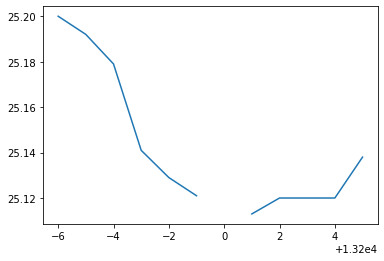

In [67]:
plt.plot(swl.index, swl)
plt.show()

In [68]:
df['swl'] = df['swl'].interpolate()

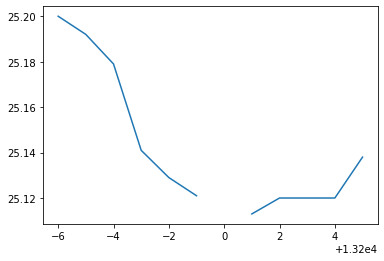

In [69]:
plt.plot(swl.index, swl)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


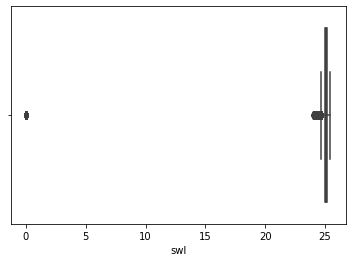

In [70]:
sns.boxplot(df['swl'])
plt.show()

In [71]:
df[df['swl'] == df['swl'].min()]

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,...,fw_1019630,rf_10184100,rf_10184110,rf_10184140,year,month,week,day,hour,minute
9054,2012-07-02 21:00,0.0,0.0,0.00,244.00,0.0,240.0,311.7,476.21,310.2,...,652.89,0.0,0.0,0.0,2012,7,27,2,21,0
9060,2012-07-02 22:00,0.0,0.0,0.00,244.00,0.0,176.0,301.7,407.18,299.2,...,564.29,0.0,0.0,0.0,2012,7,27,2,22,0
9066,2012-07-02 23:00,0.0,0.0,0.00,244.00,0.0,122.0,300.7,400.58,294.2,...,438.33,0.0,0.0,0.0,2012,7,27,2,23,0
9072,2012-07-03 00:00,0.0,0.0,0.00,244.00,0.0,80.0,295.7,368.42,285.2,...,460.03,0.0,0.0,0.0,2012,7,27,3,0,0
9078,2012-07-03 01:00,0.0,0.0,0.00,244.00,0.0,158.0,297.7,381.12,286.2,...,406.79,0.0,0.0,0.0,2012,7,27,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10392,2013-07-12 04:00,0.0,0.0,0.00,244.00,0.0,195.0,405.7,1400.11,379.2,...,1663.48,0.0,0.0,0.0,2013,7,28,12,4,0
10398,2013-07-12 05:00,0.0,0.0,0.00,244.00,0.0,290.0,402.7,1362.85,374.2,...,1600.64,0.0,0.0,0.0,2013,7,28,12,5,0
10404,2013-07-12 06:00,0.0,0.0,0.00,244.00,0.0,464.0,399.7,1326.12,372.2,...,1559.43,0.0,0.0,0.0,2013,7,28,12,6,0
10410,2013-07-12 07:00,0.0,0.0,0.00,244.00,0.0,631.0,396.7,1289.90,370.2,...,1498.64,0.0,0.0,0.0,2013,7,28,12,7,0


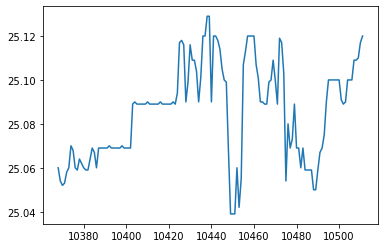

In [72]:
swl = df[(df['year'] == 2012) & (df['month'] == 7) & (df['day'] == 12)]['swl']
plt.plot(swl.index, swl)
plt.show()

In [73]:
df.loc[df['swl'] == df['swl'].min(),'swl'] =np.nan
df['swl'] = df['swl'].interpolate()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


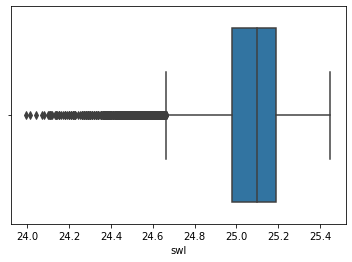

In [74]:
sns.boxplot(df['swl'])
plt.show()

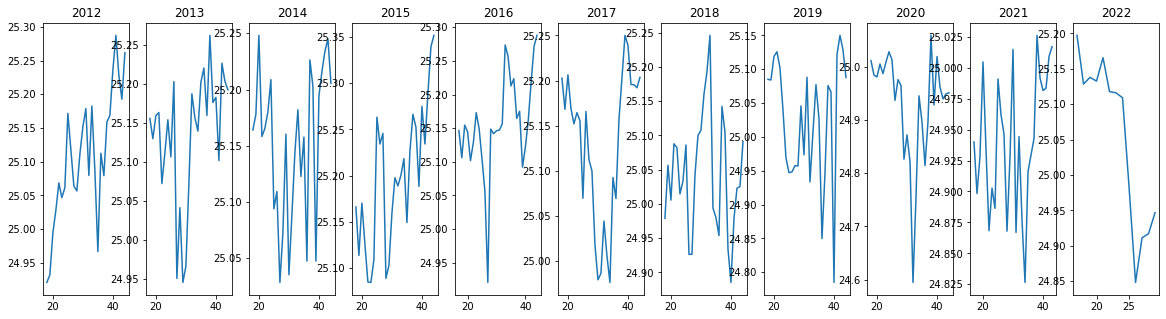

In [75]:
year_li = [i for i in range(2012,2023)]
plt.figure(figsize=(20,5))
for i in range(11):
    plt.subplot(1,11,i+1)
    df_year = df[df['year'] == year_li[i]]
    df_year_mean = df_year.groupby('week').mean()['swl']
    plt.title(f'{year_li[i]}')
    plt.plot(df_year_mean.index, df_year_mean)
plt.show()

 ## inf(팔당댐 유입량 (단위: m^3/s))

In [108]:
df[df['inf'].isna()].head()

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,...,fw_1019630,rf_10184100,rf_10184110,rf_10184140,year,month,week,day,hour,minute
13200,2012-07-31 16:00,25.117,NaN,NaN,NaN,NaN,557.0,297.7,381.12,273.2,...,337.86,0.0,0.0,0.0,2012,7,31,31,16,0
15089,2014-08-13 18:50,25.120,NaN,NaN,NaN,NaN,605.0,327.7,598.25,312.2,...,974.40,0.0,0.0,0.0,2014,8,33,13,18,50
15091,2014-08-13 19:10,25.115,NaN,NaN,NaN,NaN,660.0,322.7,558.57,309.2,...,974.40,0.0,0.0,0.0,2014,8,33,13,19,10
15092,2014-08-13 19:20,25.110,NaN,NaN,NaN,NaN,683.0,319.7,535.44,309.2,...,974.40,0.0,0.0,0.0,2014,8,33,13,19,20
15093,2014-08-13 19:30,25.105,NaN,NaN,NaN,NaN,699.0,318.7,527.84,308.2,...,974.40,0.0,0.0,0.0,2014,8,33,13,19,30


In [76]:
df[(df['year'] == 2012) & (df['month'] == 7) & (df['day'] == 31) & (df['hour'].isin([15,16]))]

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,...,fw_1019630,rf_10184100,rf_10184110,rf_10184140,year,month,week,day,hour,minute
13194,2012-07-31 15:00,25.200,758.0,233.22,10.78,658.0,460.0,286.7,314.01,272.2,...,366.60,0.0,0.0,0.0,2012,7,31,31,15,0
13195,2012-07-31 15:10,25.192,654.6,232.94,11.06,754.6,479.0,288.7,325.72,272.2,...,356.89,0.0,0.0,0.0,2012,7,31,31,15,10
13196,2012-07-31 15:20,25.179,556.7,232.46,11.54,756.7,498.0,288.7,325.72,272.2,...,356.89,0.0,0.0,0.0,2012,7,31,31,15,20
13197,2012-07-31 15:30,25.141,166.6,231.09,12.92,766.6,515.0,292.7,349.79,271.2,...,347.31,0.0,0.0,0.0,2012,7,31,31,15,30
13198,2012-07-31 15:40,25.129,61.4,230.66,13.34,761.4,531.0,293.7,355.94,273.2,...,347.31,0.0,0.0,0.0,2012,7,31,31,15,40
13199,2012-07-31 15:50,25.121,-24.6,230.38,13.62,775.4,545.0,295.7,368.42,273.2,...,337.86,0.0,0.0,0.0,2012,7,31,31,15,50
13200,2012-07-31 16:00,25.117,NaN,NaN,NaN,NaN,557.0,297.7,381.12,273.2,...,337.86,0.0,0.0,0.0,2012,7,31,31,16,0
13201,2012-07-31 16:10,25.113,677.6,230.10,13.91,777.6,566.0,298.7,387.55,275.2,...,337.86,0.0,0.0,0.0,2012,7,31,31,16,10
13202,2012-07-31 16:20,25.120,777.3,230.33,13.67,777.3,573.0,296.7,374.74,278.2,...,337.86,0.0,0.0,0.0,2012,7,31,31,16,20
13203,2012-07-31 16:30,25.120,764.3,230.33,13.67,764.3,576.0,302.7,413.83,279.2,...,356.89,0.0,0.0,0.0,2012,7,31,31,16,30


In [119]:
inf = df[(df['year'] == 2012) & (df['month'] == 7) & (df['day'] == 31) & (df['hour'].isin([15,16]))]['inf']

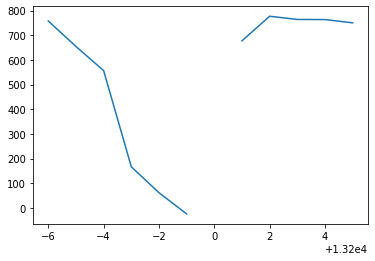

In [112]:
plt.plot(inf.index, inf)
plt.show()

In [77]:
df['inf'] = df['inf'].interpolate()

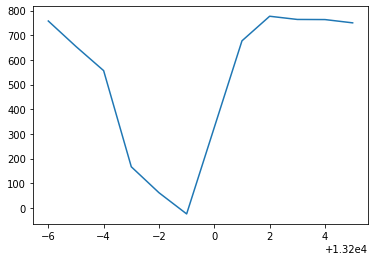

In [120]:
plt.plot(inf.index, inf)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


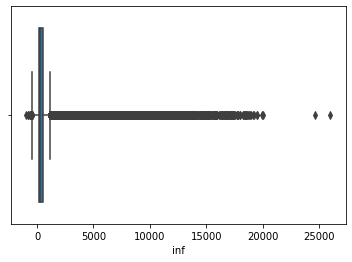

In [78]:
sns.boxplot(df['inf'])
plt.show()

In [79]:
df[df['inf'] == df['inf'].min()]

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,...,fw_1019630,rf_10184100,rf_10184110,rf_10184140,year,month,week,day,hour,minute
9460,2018-07-05 16:40,25.01,-990.0,-0.01,244.01,-990.0,147.0,369.7,987.08,346.2,...,1400.07,0.0,0.0,0.0,2018,7,27,5,16,40


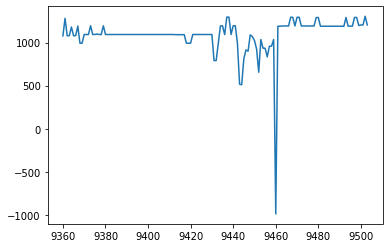

In [80]:
inf = df[(df['year'] == 2018) & (df['month'] == 7) & (df['day'] == 5)]['inf']
plt.plot(inf.index, inf)
plt.show()

In [81]:
df.loc[df['inf'] == df['inf'].min(),'inf'] =np.nan
df['inf'] = df['inf'].interpolate()

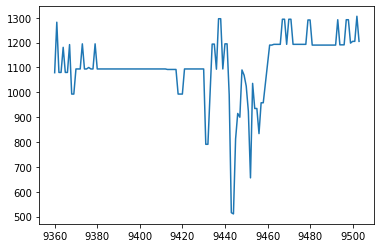

In [83]:
inf = df[(df['year'] == 2018) & (df['month'] == 7) & (df['day'] == 5)]['inf']
plt.plot(inf.index, inf)
plt.show()

In [84]:
df[df['inf'] == df['inf'].min()]

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,...,fw_1019630,rf_10184100,rf_10184110,rf_10184140,year,month,week,day,hour,minute
15233,2012-08-14 18:50,25.046,-807.5,227.67,16.33,1592.5,318.0,341.7,716.8,323.2,...,958.36,0.0,0.0,0.0,2012,8,33,14,18,50


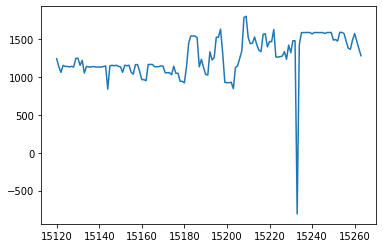

In [85]:
inf = df[(df['year'] == 2012) & (df['month'] == 8) & (df['day'] == 14)]['inf']
plt.plot(inf.index, inf)
plt.show()

In [86]:
df.loc[df['inf'] == df['inf'].min(),'inf'] =np.nan
df['inf'] = df['inf'].interpolate()

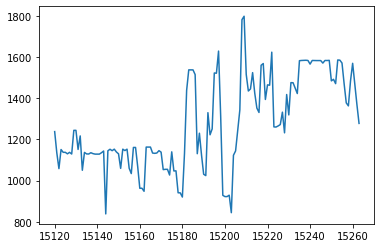

In [87]:
inf = df[(df['year'] == 2012) & (df['month'] == 8) & (df['day'] == 14)]['inf']
plt.plot(inf.index, inf)
plt.show()

In [88]:
df[df['inf'] == df['inf'].min()]

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,...,fw_1019630,rf_10184100,rf_10184110,rf_10184140,year,month,week,day,hour,minute
23027,2014-10-07 21:50,25.244,-767.2,234.82,9.18,132.8,257.0,353.7,827.2,343.2,...,1579.97,0.0,0.0,0.0,2014,10,41,7,21,50


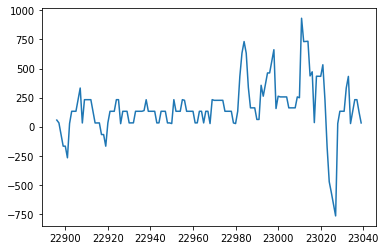

In [89]:
inf = df[(df['year'] == 2014) & (df['month'] == 10) & (df['day'] == 7)]['inf']
plt.plot(inf.index, inf)
plt.show()

In [90]:
df[df['inf'] == df['inf'].max()]

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,...,fw_1019630,rf_10184100,rf_10184110,rf_10184140,year,month,week,day,hour,minute
10006,2021-07-09 11:40,24.89,24675.0,207.44,36.56,25056.0,201.0,391.7,1230.68,371.2,...,1600.64,0.0,0.0,0.0,2021,7,27,9,11,40


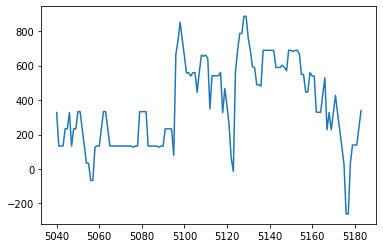

In [91]:
inf = df[(df['year'] == 2013) & (df['month'] == 6) & (df['day'] == 5)]['inf']
plt.plot(inf.index, inf)
plt.show()

In [48]:
df.loc[df['inf'] == df['inf'].max(),'inf'] =np.nan
df['inf'] = df['inf'].interpolate()

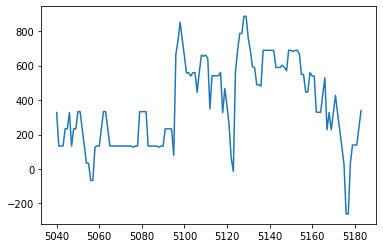

In [49]:
inf = df[(df['year'] == 2013) & (df['month'] == 6) & (df['day'] == 5)]['inf']
plt.plot(inf.index, inf)
plt.show()

In [50]:
df[df['inf'] == df['inf'].max()]

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,...,fw_1019630,rf_10184100,rf_10184110,rf_10184140,year,month,week,day,hour,minute
10006,2021-07-09 11:40,24.89,24675.0,207.44,36.56,25056.0,201.0,391.7,1230.68,371.2,...,1600.64,0.0,0.0,0.0,2021,7,27,9,11,40


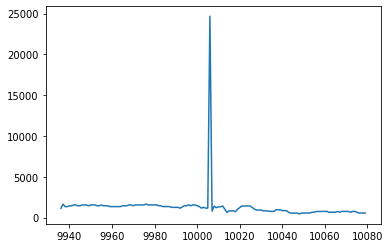

In [92]:
inf = df[(df['year'] == 2021) & (df['month'] == 7) & (df['day'] == 9)]['inf']
plt.plot(inf.index, inf)
plt.show()

In [93]:
df.loc[df['inf'] == df['inf'].max(),'inf'] =np.nan
df['inf'] = df['inf'].interpolate()

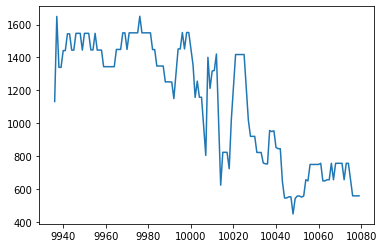

In [94]:
inf = df[(df['year'] == 2021) & (df['month'] == 7) & (df['day'] == 9)]['inf']
plt.plot(inf.index, inf)
plt.show()

In [95]:
df[df['inf'] == df['inf'].max()]

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,...,fw_1019630,rf_10184100,rf_10184110,rf_10184140,year,month,week,day,hour,minute
14034,2020-08-06 11:00,24.56,20015.0,194.63,49.37,18133.0,468.0,1252.7,NaN,1112.2,...,28306.84,0.0,0.0,0.0,2020,8,32,6,11,0


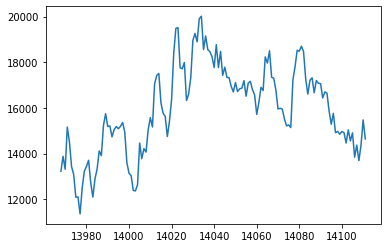

In [96]:
inf = df[(df['year'] == 2020) & (df['month'] == 8) & (df['day'] == 6)]['inf']
plt.plot(inf.index, inf)
plt.show()

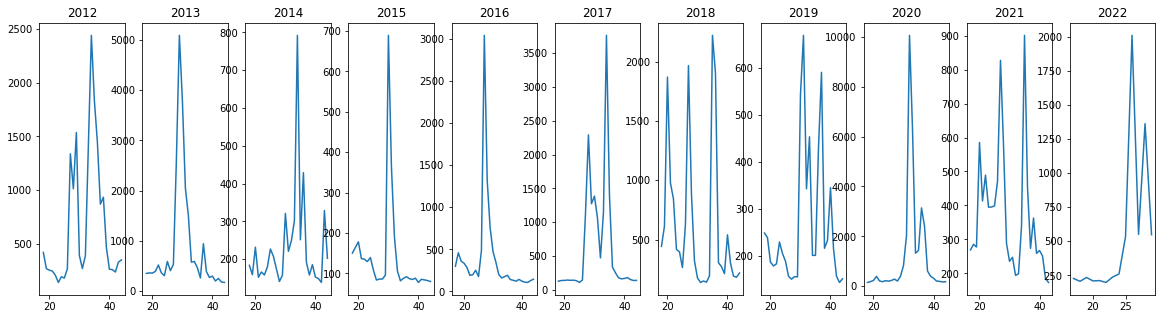

In [97]:
year_li = [i for i in range(2012,2023)]
plt.figure(figsize=(20,5))
for i in range(11):
    plt.subplot(1,11,i+1)
    df_year = df[df['year'] == year_li[i]]
    df_year_mean = df_year.groupby('week').mean()['inf']
    plt.title(f'{year_li[i]}')
    plt.plot(df_year_mean.index, df_year_mean)
plt.show()

## sfw(팔당댐 저수량 (단위: 만m^3))

In [98]:
df['sfw'] = df['sfw'].interpolate()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


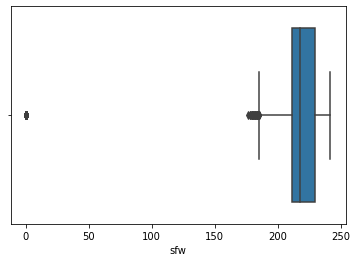

In [108]:
sns.boxplot(df['sfw'])
plt.show()

In [100]:
df[df['sfw'] == df['sfw'].min()]

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,...,fw_1019630,rf_10184100,rf_10184110,rf_10184140,year,month,week,day,hour,minute
9460,2018-07-05 16:40,25.01,1113.0,-0.01,244.01,-990.0,147.0,369.7,987.08,346.2,...,1400.07,0.0,0.0,0.0,2018,7,27,5,16,40


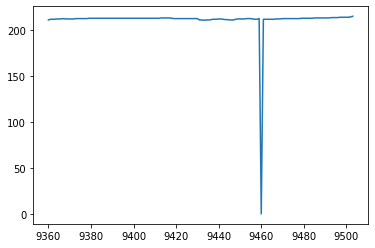

In [103]:
sfw = df[(df['year'] == 2018) & (df['month'] == 7) & (df['day'] == 5)]['sfw']
plt.plot(swl.index, sfw)
plt.show()

In [104]:
df.loc[df['sfw'] == df['sfw'].min(),'sfw'] =np.nan
df['sfw'] = df['sfw'].interpolate()

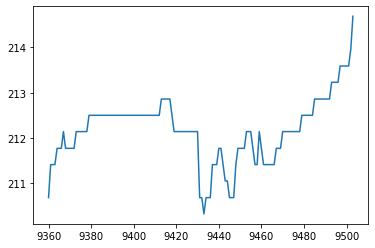

In [105]:
sfw = df[(df['year'] == 2018) & (df['month'] == 7) & (df['day'] == 5)]['sfw']
plt.plot(swl.index, sfw)
plt.show()

In [106]:
df[df['sfw'] == df['sfw'].min()]

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,...,fw_1019630,rf_10184100,rf_10184110,rf_10184140,year,month,week,day,hour,minute
9054,2012-07-02 21:00,25.2025,0.0,0.0,244.0,0.0,240.0,311.7,476.21,310.2,...,652.89,0.0,0.0,0.0,2012,7,27,2,21,0
9060,2012-07-02 22:00,25.2145,0.0,0.0,244.0,0.0,176.0,301.7,407.18,299.2,...,564.29,0.0,0.0,0.0,2012,7,27,2,22,0
9066,2012-07-02 23:00,25.2155,0.0,0.0,244.0,0.0,122.0,300.7,400.58,294.2,...,438.33,0.0,0.0,0.0,2012,7,27,2,23,0
9072,2012-07-03 00:00,25.1990,0.0,0.0,244.0,0.0,80.0,295.7,368.42,285.2,...,460.03,0.0,0.0,0.0,2012,7,27,3,0,0
9078,2012-07-03 01:00,25.2100,0.0,0.0,244.0,0.0,158.0,297.7,381.12,286.2,...,406.79,0.0,0.0,0.0,2012,7,27,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10386,2013-07-12 03:00,25.1565,0.0,0.0,244.0,0.0,128.0,410.7,1463.34,383.2,...,1749.20,0.0,0.0,0.0,2013,7,28,12,3,0
10392,2013-07-12 04:00,25.1415,0.0,0.0,244.0,0.0,195.0,405.7,1400.11,379.2,...,1663.48,0.0,0.0,0.0,2013,7,28,12,4,0
10398,2013-07-12 05:00,25.0880,0.0,0.0,244.0,0.0,290.0,402.7,1362.85,374.2,...,1600.64,0.0,0.0,0.0,2013,7,28,12,5,0
10404,2013-07-12 06:00,25.0390,0.0,0.0,244.0,0.0,464.0,399.7,1326.12,372.2,...,1559.43,0.0,0.0,0.0,2013,7,28,12,6,0


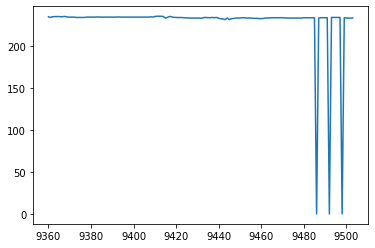

In [110]:
sfw = df[(df['year'] == 2012) & (df['month'] == 7) & (df['day'] == 2)]['sfw']
plt.plot(swl.index, sfw)
plt.show()

In [111]:
df.loc[df['sfw'] == df['sfw'].min(),'sfw'] =np.nan
df['sfw'] = df['sfw'].interpolate()

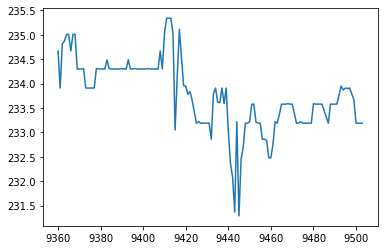

In [114]:
sfw = df[(df['year'] == 2012) & (df['month'] == 7) & (df['day'] == 2)]['sfw']
plt.plot(swl.index, sfw)
plt.show()

In [116]:
df[df['sfw'] == df['sfw'].min()]

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,...,fw_1019630,rf_10184100,rf_10184110,rf_10184140,year,month,week,day,hour,minute
13634,2020-08-03 16:20,24.07,8861.0,176.38,67.62,10348.0,522.0,975.7,NaN,868.2,...,14810.24,0.0,0.0,0.0,2020,8,32,3,16,20


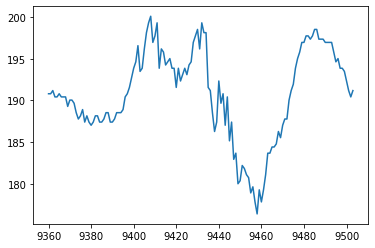

In [117]:
sfw = df[(df['year'] == 2020) & (df['month'] == 8) & (df['day'] == 3)]['sfw']
plt.plot(swl.index, sfw)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


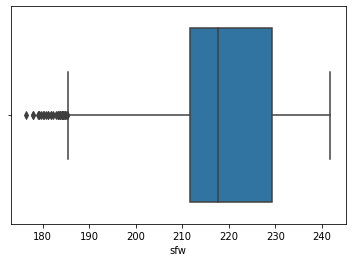

In [115]:
sns.boxplot(df['sfw'])
plt.show()

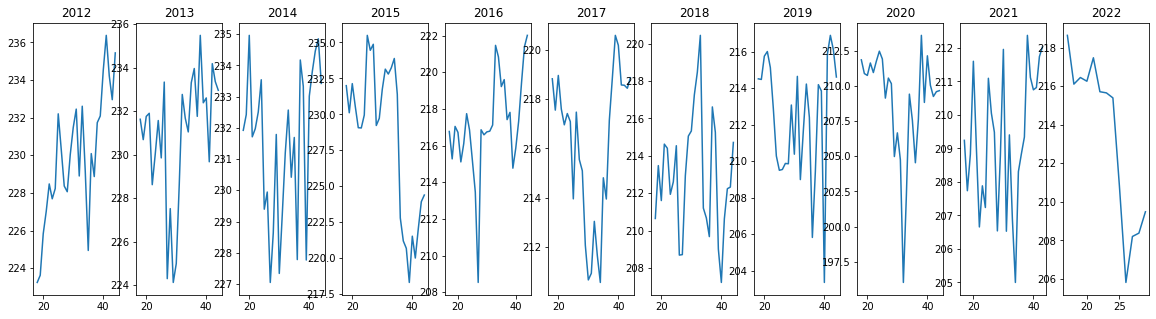

In [142]:
year_li = [i for i in range(2012,2023)]
plt.figure(figsize=(20,5))
for i in range(11):
    plt.subplot(1,11,i+1)
    df_year = df[df['year'] == year_li[i]]
    df_year_mean = df_year.groupby('week').mean()['sfw']
    plt.title(f'{year_li[i]}')
    plt.plot(df_year_mean.index, df_year_mean)
plt.show()

## ecpc(팔당댐 공용량 (단위: 백만m^3))

In [124]:
df['ecpc'] = df['ecpc'].interpolate()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


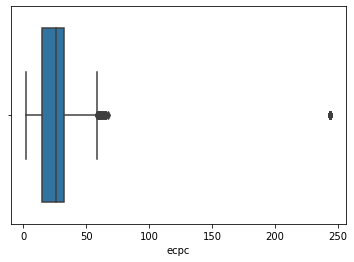

In [126]:
sns.boxplot(df['ecpc'])
plt.show()

In [128]:
df[df['ecpc'] == df['ecpc'].max()]

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,...,fw_1019630,rf_10184100,rf_10184110,rf_10184140,year,month,week,day,hour,minute
9460,2018-07-05 16:40,25.01,1113.0,211.775,244.01,-990.0,147.0,369.7,987.08,346.2,...,1400.07,0.0,0.0,0.0,2018,7,27,5,16,40


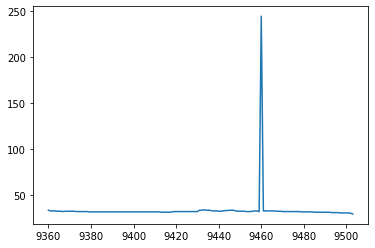

In [129]:
ecpc = df[(df['year'] == 2018) & (df['month'] == 7) & (df['day'] == 5)]['ecpc']
plt.plot(ecpc.index, ecpc)
plt.show()

In [130]:
df.loc[df['ecpc'] == df['ecpc'].max(),'ecpc'] =np.nan
df['ecpc'] = df['ecpc'].interpolate()

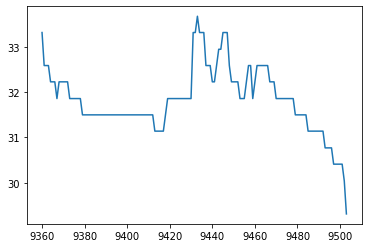

In [131]:
ecpc = df[(df['year'] == 2018) & (df['month'] == 7) & (df['day'] == 5)]['ecpc']
plt.plot(ecpc.index, ecpc)
plt.show()

In [132]:
df[df['ecpc'] == df['ecpc'].max()]

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,...,fw_1019630,rf_10184100,rf_10184110,rf_10184140,year,month,week,day,hour,minute
9054,2012-07-02 21:00,25.2025,0.0,233.320,244.0,0.0,240.0,311.7,476.21,310.2,...,652.89,0.0,0.0,0.0,2012,7,27,2,21,0
9060,2012-07-02 22:00,25.2145,0.0,233.765,244.0,0.0,176.0,301.7,407.18,299.2,...,564.29,0.0,0.0,0.0,2012,7,27,2,22,0
9066,2012-07-02 23:00,25.2155,0.0,233.790,244.0,0.0,122.0,300.7,400.58,294.2,...,438.33,0.0,0.0,0.0,2012,7,27,2,23,0
9072,2012-07-03 00:00,25.1990,0.0,233.190,244.0,0.0,80.0,295.7,368.42,285.2,...,460.03,0.0,0.0,0.0,2012,7,27,3,0,0
9078,2012-07-03 01:00,25.2100,0.0,233.580,244.0,0.0,158.0,297.7,381.12,286.2,...,406.79,0.0,0.0,0.0,2012,7,27,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10386,2013-07-12 03:00,25.1565,0.0,231.645,244.0,0.0,128.0,410.7,1463.34,383.2,...,1749.20,0.0,0.0,0.0,2013,7,28,12,3,0
10392,2013-07-12 04:00,25.1415,0.0,231.105,244.0,0.0,195.0,405.7,1400.11,379.2,...,1663.48,0.0,0.0,0.0,2013,7,28,12,4,0
10398,2013-07-12 05:00,25.0880,0.0,229.200,244.0,0.0,290.0,402.7,1362.85,374.2,...,1600.64,0.0,0.0,0.0,2013,7,28,12,5,0
10404,2013-07-12 06:00,25.0390,0.0,227.410,244.0,0.0,464.0,399.7,1326.12,372.2,...,1559.43,0.0,0.0,0.0,2013,7,28,12,6,0


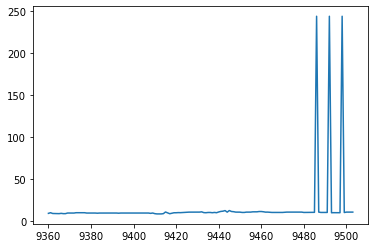

In [133]:
ecpc = df[(df['year'] == 2012) & (df['month'] == 7) & (df['day'] == 2)]['ecpc']
plt.plot(swl.index, ecpc)
plt.show()

In [134]:
df.loc[df['ecpc'] == df['ecpc'].max(),'ecpc'] =np.nan
df['ecpc'] = df['ecpc'].interpolate()

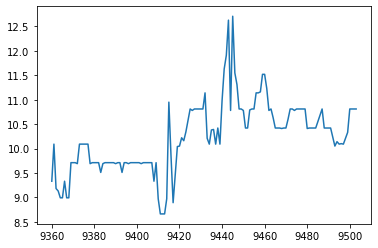

In [135]:
ecpc = df[(df['year'] == 2012) & (df['month'] == 7) & (df['day'] == 2)]['ecpc']
plt.plot(swl.index, ecpc)
plt.show()

In [136]:
df[df['ecpc'] == df['ecpc'].max()]

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,...,fw_1019630,rf_10184100,rf_10184110,rf_10184140,year,month,week,day,hour,minute
13634,2020-08-03 16:20,24.07,8861.0,176.38,67.62,10348.0,522.0,975.7,NaN,868.2,...,14810.24,0.0,0.0,0.0,2020,8,32,3,16,20


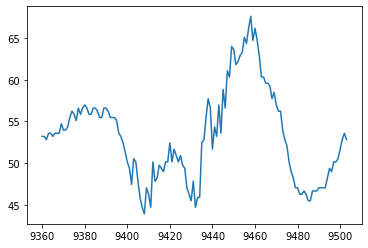

In [137]:
ecpc = df[(df['year'] == 2020) & (df['month'] == 8) & (df['day'] == 3)]['ecpc']
plt.plot(swl.index, ecpc)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


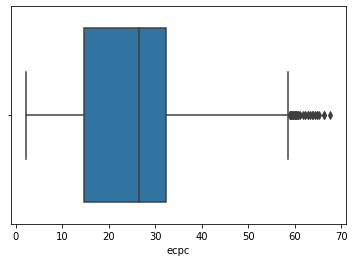

In [138]:
sns.boxplot(df['ecpc'])
plt.show()

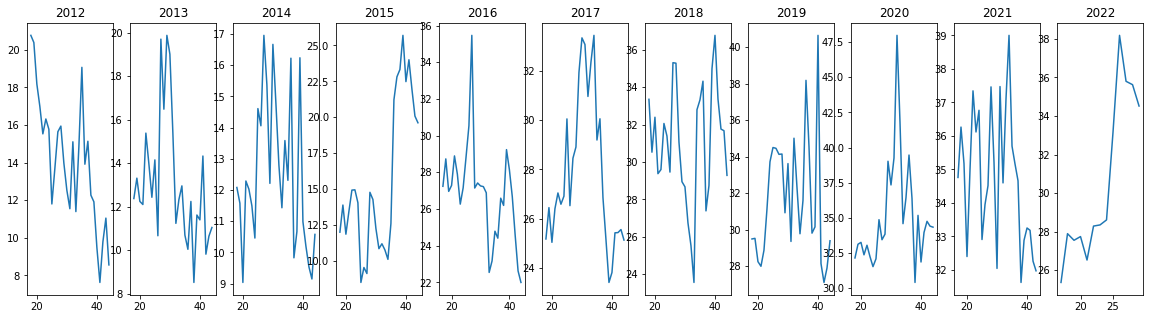

In [141]:
year_li = [i for i in range(2012,2023)]
plt.figure(figsize=(20,5))
for i in range(11):
    plt.subplot(1,11,i+1)
    df_year = df[df['year'] == year_li[i]]
    df_year_mean = df_year.groupby('week').mean()['ecpc']
    plt.title(f'{year_li[i]}')
    plt.plot(df_year_mean.index, df_year_mean)
plt.show()

## tototf(총 방류량 (단위: m^3/s))

In [145]:
df['tototf'] = df['tototf'].interpolate()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


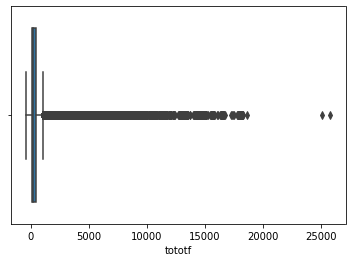

In [152]:
sns.boxplot(df['tototf'])
plt.show()

In [147]:
df[df['tototf'] == df['tototf'].min()]

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,...,fw_1019630,rf_10184100,rf_10184110,rf_10184140,year,month,week,day,hour,minute
9460,2018-07-05 16:40,25.01,1113.0,211.775,32.225,-990.0,147.0,369.7,987.08,346.2,...,1400.07,0.0,0.0,0.0,2018,7,27,5,16,40


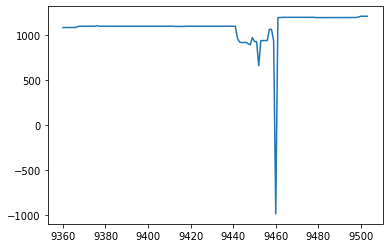

In [149]:
tototf = df[(df['year'] == 2018) & (df['month'] == 7) & (df['day'] == 5)]['tototf']
plt.plot(tototf.index, tototf)
plt.show()

In [150]:
df.loc[df['tototf'] == df['tototf'].min(),'tototf'] =np.nan
df['tototf'] = df['tototf'].interpolate()

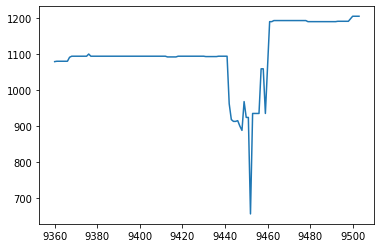

In [151]:
tototf = df[(df['year'] == 2018) & (df['month'] == 7) & (df['day'] == 5)]['tototf']
plt.plot(tototf.index, tototf)
plt.show()

In [153]:
df[df['tototf'] == df['tototf'].max()]

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,...,fw_1019630,rf_10184100,rf_10184110,rf_10184140,year,month,week,day,hour,minute
5099,2013-06-05 09:50,25.12,754.0,230.33,13.67,25791.5,149.0,285.7,308.24,281.2,...,396.55,0.0,0.0,0.0,2013,6,23,5,9,50


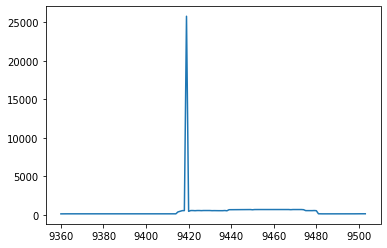

In [154]:
tototf = df[(df['year'] == 2013) & (df['month'] == 6) & (df['day'] == 5)]['tototf']
plt.plot(tototf.index, tototf)
plt.show()

In [155]:
df.loc[df['tototf'] == df['tototf'].max(),'tototf'] =np.nan
df['tototf'] = df['tototf'].interpolate()

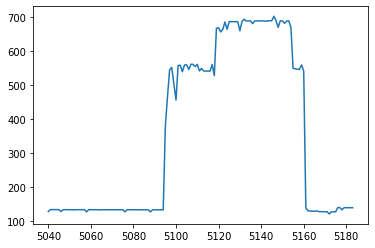

In [157]:
tototf = df[(df['year'] == 2013) & (df['month'] == 6) & (df['day'] == 5)]['tototf']
plt.plot(tototf.index, tototf)
plt.show()

In [158]:
df[df['tototf'] == df['tototf'].max()]

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,...,fw_1019630,rf_10184100,rf_10184110,rf_10184140,year,month,week,day,hour,minute
10006,2021-07-09 11:40,24.89,981.0,207.44,36.56,25056.0,201.0,391.7,1230.68,371.2,...,1600.64,0.0,0.0,0.0,2021,7,27,9,11,40


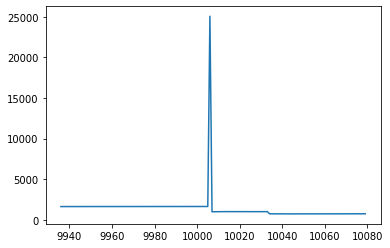

In [159]:
tototf = df[(df['year'] == 2021) & (df['month'] == 7) & (df['day'] == 9)]['tototf']
plt.plot(tototf.index, tototf)
plt.show()

In [160]:
df.loc[df['tototf'] == df['tototf'].max(),'tototf'] =np.nan
df['tototf'] = df['tototf'].interpolate()

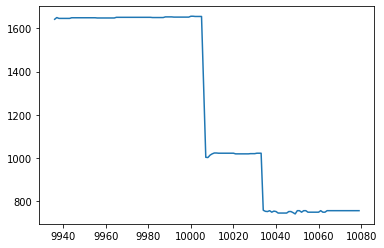

In [161]:
tototf = df[(df['year'] == 2021) & (df['month'] == 7) & (df['day'] == 9)]['tototf']
plt.plot(tototf.index, tototf)
plt.show()

In [162]:
df[df['tototf'] == df['tototf'].max()]

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,...,fw_1019630,rf_10184100,rf_10184110,rf_10184140,year,month,week,day,hour,minute
3265,2016-05-23 16:10,25.066,18615.26,213.8,30.2,18615.26,244.0,317.7,520.3,306.2,...,790.92,0.0,0.0,0.0,2016,5,21,23,16,10


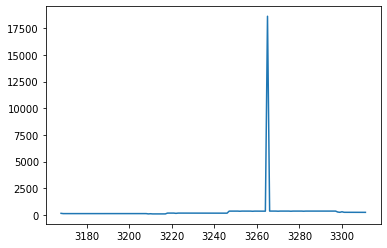

In [163]:
tototf = df[(df['year'] == 2016) & (df['month'] == 5) & (df['day'] == 23)]['tototf']
plt.plot(tototf.index, tototf)
plt.show()

In [164]:
df.loc[df['tototf'] == df['tototf'].max(),'tototf'] =np.nan
df['tototf'] = df['tototf'].interpolate()

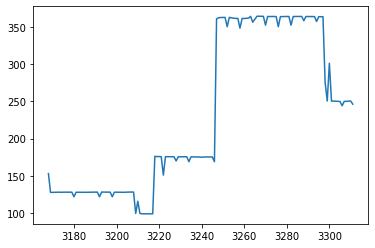

In [165]:
tototf = df[(df['year'] == 2016) & (df['month'] == 5) & (df['day'] == 23)]['tototf']
plt.plot(tototf.index, tototf)
plt.show()

In [166]:
df[df['tototf'] == df['tototf'].max()]

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,...,fw_1019630,rf_10184100,rf_10184110,rf_10184140,year,month,week,day,hour,minute
14026,2020-08-06 09:40,24.41,17988.0,188.9,55.1,18302.0,603.0,1197.7,NaN,1067.2,...,27681.93,0.0,0.0,0.0,2020,8,32,6,9,40


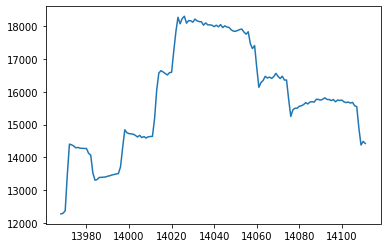

In [167]:
tototf = df[(df['year'] == 2020) & (df['month'] == 8) & (df['day'] == 6)]['tototf']
plt.plot(tototf.index, tototf)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


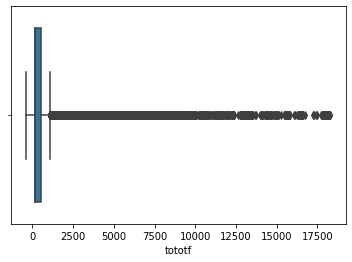

In [168]:
sns.boxplot(df['tototf'])
plt.show()

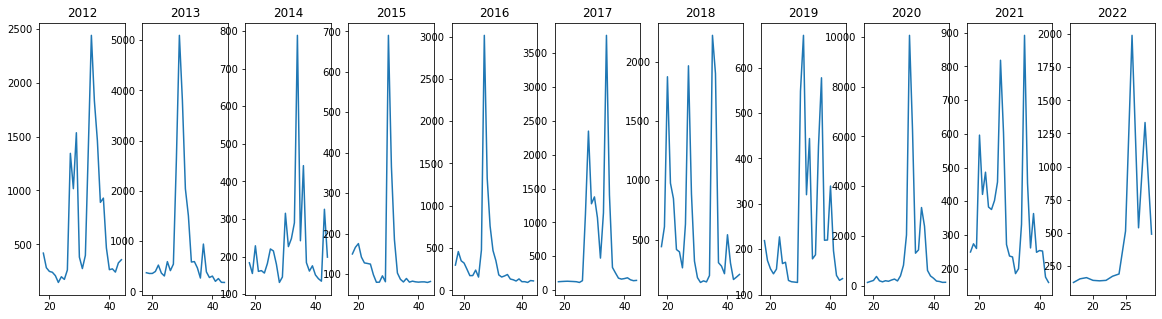

In [169]:
year_li = [i for i in range(2012,2023)]
plt.figure(figsize=(20,5))
for i in range(11):
    plt.subplot(1,11,i+1)
    df_year = df[df['year'] == year_li[i]]
    df_year_mean = df_year.groupby('week').mean()['tototf']
    plt.title(f'{year_li[i]}')
    plt.plot(df_year_mean.index, df_year_mean)
plt.show()

## tide_level(강화대교 조위 (단위: cm))

In [173]:
df[df['tide_level'].isna()]

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,...,fw_1019630,rf_10184100,rf_10184110,rf_10184140,year,month,week,day,hour,minute
193,2012-05-02 08:10,24.949,261.80,224.19,19.81,261.80,NaN,288.7,325.72,284.2,...,376.45,0.0,0.0,0.0,2012,5,18,2,8,10
307,2012-05-03 03:10,24.940,401.80,223.87,20.13,401.80,NaN,304.7,427.30,295.2,...,493.58,0.0,0.0,0.0,2012,5,18,3,3,10
1359,2012-05-10 10:30,25.039,352.70,227.41,16.60,352.70,NaN,287.7,319.84,299.2,...,974.40,0.0,0.0,0.0,2012,5,19,10,10,30
1377,2012-05-10 13:30,24.960,-366.00,224.57,19.43,327.20,NaN,354.7,836.77,348.2,...,1286.29,0.0,0.0,0.0,2012,5,19,10,13,30
1378,2012-05-10 13:40,24.960,-366.00,224.57,19.43,327.20,NaN,349.7,789.50,346.2,...,1249.45,0.0,0.0,0.0,2012,5,19,10,13,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,2022-05-16 08:40,25.110,164.83,215.42,28.58,164.83,NaN,351.7,808.24,341.2,...,1107.57,0.0,0.0,0.0,2022,5,20,16,8,40
5044,2022-06-05 00:40,25.090,1345.33,214.69,29.31,126.99,NaN,0.0,314.01,0.0,...,328.54,0.0,0.0,0.0,2022,6,22,5,0,40
5423,2022-06-07 15:50,25.190,175.46,218.36,25.64,175.46,NaN,0.0,NaN,0.0,...,406.79,0.0,0.0,0.0,2022,6,23,7,15,50
7544,2022-06-22 09:20,24.940,0.00,209.24,34.76,170.94,NaN,0.0,NaN,0.0,...,406.79,0.0,0.0,0.0,2022,6,25,22,9,20


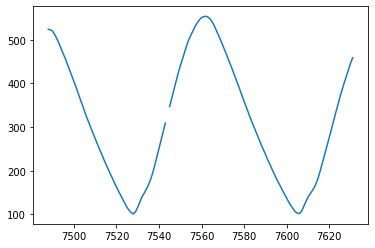

In [175]:
tototf = df[(df['year'] == 2022) & (df['month'] == 6) & (df['day'] == 22)]['tide_level']
plt.plot(tototf.index, tototf)
plt.show()

In [176]:
df['tide_level'] = df['tide_level'].interpolate()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


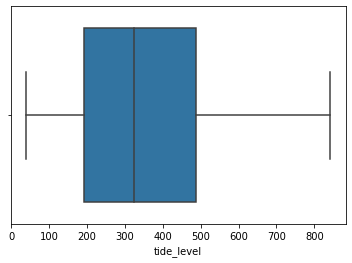

In [177]:
sns.boxplot(df['tide_level'])
plt.show()

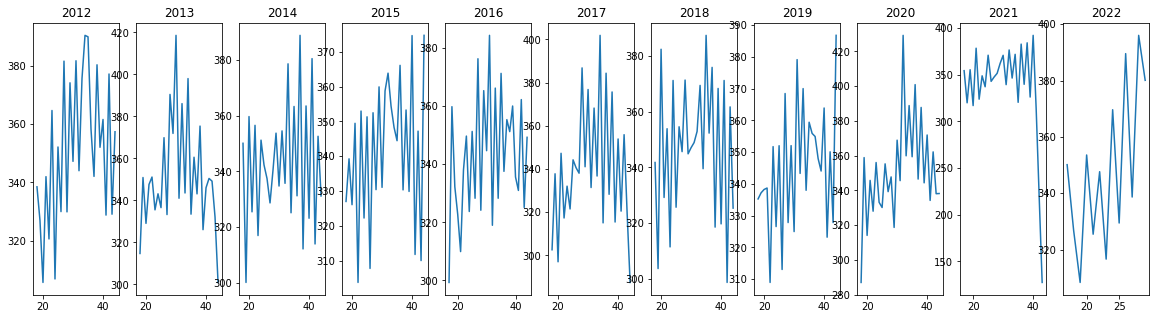

In [180]:
year_li = [i for i in range(2012,2023)]
plt.figure(figsize=(20,5))
for i in range(11):
    plt.subplot(1,11,i+1)
    df_year = df[df['year'] == year_li[i]]
    df_year_mean = df_year.groupby('week').mean()['tide_level']
    plt.title(f'{year_li[i]}')
    plt.plot(df_year_mean.index, df_year_mean)
plt.show()

## fw_1018662(청담대교 유량 (단위: m^3/s))

In [186]:
df.isna().sum()

ymdhm               0
swl                 0
inf                 0
sfw                 0
ecpc                0
tototf              0
tide_level          0
wl_1018662         59
fw_1018662      16380
wl_1018680         59
fw_1018680     196849
wl_1018683         59
fw_1018683       1279
wl_1019630         59
fw_1019630         59
rf_10184100         0
rf_10184110         0
rf_10184140         0
year                0
month               0
week                0
day                 0
hour                0
minute              0
dtype: int64

In [179]:
df[df['fw_1018662'].isna()]

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,...,fw_1019630,rf_10184100,rf_10184110,rf_10184140,year,month,week,day,hour,minute
1506,2015-05-11 11:00,25.040,128.00,227.44,16.56,128.00,598.0,272.7,NaN,266.2,...,328.54,0.0,0.0,0.0,2015,5,20,11,11,0
1507,2015-05-11 11:10,24.949,128.10,224.19,19.81,128.10,592.0,272.7,NaN,266.2,...,328.54,0.0,0.0,0.0,2015,5,20,11,11,10
1508,2015-05-11 11:20,24.949,128.10,224.19,19.81,128.10,584.0,272.7,NaN,266.2,...,328.54,0.0,0.0,0.0,2015,5,20,11,11,20
1509,2015-05-11 11:30,24.949,128.10,224.19,19.81,128.10,574.0,272.7,NaN,266.2,...,328.54,0.0,0.0,0.0,2015,5,20,11,11,30
1510,2015-05-11 11:40,24.949,128.10,224.19,19.81,128.10,565.0,271.7,NaN,266.2,...,328.54,0.0,0.0,0.0,2015,5,20,11,11,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8815,2022-07-01 05:10,24.860,5570.84,206.37,37.63,5570.84,549.0,0.0,NaN,0.0,...,8823.35,0.0,0.0,0.0,2022,7,26,1,5,10
8816,2022-07-01 05:20,24.870,6172.61,206.73,37.27,5575.95,577.0,0.0,NaN,0.0,...,8675.36,0.0,0.0,0.0,2022,7,26,1,5,20
8817,2022-07-01 05:30,24.870,5579.11,206.73,37.27,5579.11,601.0,0.0,NaN,0.0,...,8577.41,1.0,0.0,0.0,2022,7,26,1,5,30
8818,2022-07-01 05:40,24.870,5579.76,206.73,37.27,5579.76,628.0,0.0,NaN,0.0,...,8480.03,0.0,0.0,0.0,2022,7,26,1,5,40


In [188]:
df['fw_1018662'] = df['fw_1018662'].interpolate()

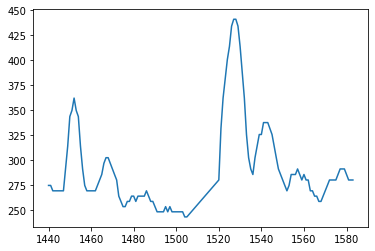

In [189]:
tototf = df[(df['year'] == 2015) & (df['month'] == 5) & (df['day'] == 11)]['fw_1018662']
plt.plot(tototf.index, tototf)
plt.show()

In [182]:
df[df['wl_1018662'].isna()]

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,...,fw_1019630,rf_10184100,rf_10184110,rf_10184140,year,month,week,day,hour,minute
8133,2017-06-26 11:30,24.984,0.00,210.86,33.15,98.87,347.0,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,2017,6,26,26,11,30
8134,2017-06-26 11:40,24.979,0.00,210.66,33.34,98.90,331.0,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,2017,6,26,26,11,40
8135,2017-06-26 11:50,24.979,0.00,210.66,33.34,98.90,315.0,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,2017,6,26,26,11,50
8136,2017-06-26 12:00,25.090,13.00,214.69,29.31,115.00,300.0,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,2017,6,26,26,12,0
8137,2017-06-26 12:10,24.988,199.46,210.95,33.05,98.86,285.0,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,2017,6,26,26,12,10
8138,2017-06-26 12:20,24.999,300.00,211.38,32.62,98.80,271.0,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,2017,6,26,26,12,20
8139,2017-06-26 12:30,24.999,294.74,211.38,32.62,93.54,257.0,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,2017,6,26,26,12,30
8140,2017-06-26 12:40,25.010,400.75,211.77,32.23,98.75,244.0,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,2017,6,26,26,12,40
8141,2017-06-26 12:50,25.010,400.75,211.77,32.23,98.75,231.0,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,2017,6,26,26,12,50
8142,2017-06-26 13:00,25.090,13.00,214.69,29.31,115.00,219.0,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,2017,6,26,26,13,0


In [185]:
df.tail()

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,...,fw_1019630,rf_10184100,rf_10184110,rf_10184140,year,month,week,day,hour,minute
11371,2022-07-18 23:10,25.04,259.23,212.86,31.14,259.23,510.0,0.0,319.84,0.0,...,974.40,0.0,0.0,0.0,2022,7,29,18,23,10
11372,2022-07-18 23:20,25.04,260.46,212.86,31.14,260.46,492.0,0.0,314.01,0.0,...,1006.88,0.0,0.0,0.0,2022,7,29,18,23,20
11373,2022-07-18 23:30,25.04,259.37,212.86,31.14,259.37,475.0,0.0,387.55,0.0,...,1039.90,0.0,0.0,0.0,2022,7,29,18,23,30
11374,2022-07-18 23:40,25.04,259.13,212.86,31.14,259.13,458.0,0.0,454.91,0.0,...,1073.46,0.0,0.0,0.0,2022,7,29,18,23,40
11375,2022-07-18 23:50,25.04,258.16,212.86,31.14,258.16,442.0,0.0,582.21,0.0,...,1090.45,0.0,0.0,0.0,2022,7,29,18,23,50


In [184]:
sub = pd.read_csv('/content/sample_submission.csv')
sub

,ymdhm,wl_1018662,wl_1018680,wl_1018683,wl_1019630
0,2022-06-01 00:00,0,0,0,0
1,2022-06-01 00:10,0,0,0,0
2,2022-06-01 00:20,0,0,0,0
3,2022-06-01 00:30,0,0,0,0
4,2022-06-01 00:40,0,0,0,0
...,...,...,...,...,...
6907,2022-07-18 23:10,0,0,0,0
6908,2022-07-18 23:20,0,0,0,0
6909,2022-07-18 23:30,0,0,0,0
6910,2022-07-18 23:40,0,0,0,0
